## JWST F770W 30Dor ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 20 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F770W"
fwhm = 2.2
basename = "jw0272900200"

crval = [84.69695784078512, -69.09492271266589]
# rotation = 0.0
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [0.2342195515193774, -0.9316779689106902]
tile2_shifts = [0.7884962280416655, -0.09212854823862968]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [15., 350.]
# display range for calibrated images
drange_cal = [4., 200.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F770W/stage0/jw02729002001_02101_00008_mirimage_uncal.fits', './F770W/stage0/jw02729002002_02101_00008_mirimage_uncal.fits', './F770W/stage0/jw02729002001_02101_00006_mirimage_uncal.fits', './F770W/stage0/jw02729002002_02101_00009_mirimage_uncal.fits', './F770W/stage0/jw02729002002_02101_00005_mirimage_uncal.fits', './F770W/stage0/jw02729002001_02101_00009_mirimage_uncal.fits', './F770W/stage0/jw02729002002_02101_00006_mirimage_uncal.fits', './F770W/stage0/jw02729002001_02101_00004_mirimage_uncal.fits', './F770W/stage0/jw02729002001_02101_00010_mirimage_uncal.fits', './F770W/stage0/jw02729002001_02101_00002_mirimage_uncal.fits', './F770W/stage0/jw02729002002_02101_00004_mirimage_uncal.fits', './F770W/stage0/jw02729002001_02101_00005_mirimage_uncal.fits', './F770W/stage0/jw02729002002_02101_00001_mirimage_uncal.fits', './F770W/stage0/jw02729002002_02101_00007_mirimage_uncal.fits', './F770W/stage0/jw02729002001_02101_00007_mirimage_uncal.fits', './F770W/stage0/jw02729002001_02101_000

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-20 11:02:53,269 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-20 11:02:53,270 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-20 11:02:53,270 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-20 11:02:53,271 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-20 11:02:53,271 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-20 11:02:53,272 - stpipe 

./F770W/stage0/jw02729002001_02101_00008_mirimage_uncal.fits


2022-07-20 11:02:53,376 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-07-20 11:03:00,338 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:03:00,339 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
2022-07-20 11:03:00,340 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_mask_0030.fits'.
2022-07-20 11:03:00,342 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSAT reference file is 'N/A'.
2022-07-20 11:03:00,342 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_readnoise_0057.fits'.
2022-07-20 11:03:00,344 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is 'N/A'.
2022-07-20 11:03:00,344 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference fil

2022-07-20 11:03:10,066 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00008_mirimage_uncal.fits>,).
2022-07-20 11:03:10,067 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0', 'type': 'baseline'}
2022-07-20 11:03:10,086 - stpipe.Detector1Pipeline.rscd - INFO - Using RSCD reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_rscd_0017.fits
2022-07-20 11:03:10,275 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd done
2022-07-20 11:03:10,366 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00008_mirimage_uncal.fits>,).
2022-07-2

2022-07-20 11:05:01,731 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:05:01,750 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:05:01,749 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:05:01,753 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1048 pixels with at least one CR from five groups.
2022-07-20 11:05:01,753 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-20 11:05:01,754 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 11:05:01,781 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 411 pixels with at least one CR from f

2022-07-20 11:05:02,052 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-20 11:05:02,053 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 11:05:02,071 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:05:02,086 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1373 pixels with at least one CR from five groups.
2022-07-20 11:05:02,088 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from four groups.
2022-07-20 11:05:02,089 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 707 pixels with at least one CR from five groups.
2022-07-20 11:05:02,090 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three gr

2022-07-20 11:05:02,387 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-20 11:05:02,390 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 605 pixels with at least one CR from five groups.
2022-07-20 11:05:02,391 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:05:02,392 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-20 11:05:02,411 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 608 pixels with at least one CR from five groups.
2022-07-20 11:05:02,412 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 11:05:02,413 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-20 11:05:06,336 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:05:06,438 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00008_mirimage_uncal.fits>,).
2022-07-20 11:05:06,440 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:05:06,474 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-20 11:05:06,475 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-20 11:05:06,479 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done
2022-07-20 11:05:06,572 - stpipe.Detector1Pipeline.ga

2022-07-20 11:05:08,763 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 11:05:08,764 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-20 11:05:08,765 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-20 11:05:08,766 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F770W/stage0/jw02729002002_02101_00008_mirimage_uncal.fits


2022-07-20 11:05:10,160 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:05:10,168 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:05:10,170 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:05:10,172 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:05:10,173 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:05:13,688 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:05:13,707 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:05:14,198 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:05:14,295 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00008_mirimage_uncal.fits>,).
2022-07-20 11:05:14,296 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:05:18,192 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 641 pixels with at least one CR from five groups.
2022-07-20 11:05:18,192 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-20 11:05:18,193 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-20 11:05:18,215 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:05:18,227 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:05:18,230 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 678 pixels with at least one CR from five groups.
2022-07-20 11:05:18,231 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-20 11:05:18,475 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:05:18,478 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 466 pixels with at least one CR from five groups.
2022-07-20 11:05:18,479 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:05:18,480 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-20 11:05:18,480 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1523 pixels with at least one CR from five groups.
2022-07-20 11:05:18,481 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26 pixels with at least one CR from four groups.
2022-07-20 11:05:1

2022-07-20 11:05:18,817 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 613 pixels with at least one CR from five groups.
2022-07-20 11:05:18,818 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 11:05:18,818 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:05:18,841 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:05:18,843 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:05:18,854 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:05:18,875 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:05:18,888 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:05:18,891 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, tw

2022-07-20 11:05:21,972 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:22,030 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:05:22,032 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:22,226 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:05:22,228 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:22,362 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:05:22,466 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00008_mirimage_uncal.fits>,).
2022-07-20 11:05:22,467 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'o

2022-07-20 11:05:24,723 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:05:24,724 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 11:05:24,724 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 11:05:24,725 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02729002001_02101_00006_mirimage_uncal.fits


2022-07-20 11:05:26,133 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:05:26,140 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:05:26,141 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:05:26,142 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:05:26,143 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:05:29,603 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:05:29,622 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:05:30,082 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:05:30,180 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00006_mirimage_uncal.fits>,).
2022-07-20 11:05:30,181 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:05:33,885 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:05:33,902 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:05:33,898 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:05:33,901 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 774 pixels with at least one CR from five groups.
2022-07-20 11:05:33,902 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 11:05:33,938 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:05:33,945 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:05:33,953 - stpipe.Detector1Pipeline.

2022-07-20 11:05:34,206 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:05:34,207 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:05:34,210 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:05:34,241 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:05:34,243 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:05:34,245 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1862 pixels with at least one CR from five groups.
2022-07-20 11:05:34,246 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 20 pixels with at least one CR from fo

2022-07-20 11:05:34,587 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:05:34,603 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 706 pixels with at least one CR from five groups.
2022-07-20 11:05:34,604 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 11:05:34,604 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 11:05:34,605 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1180 pixels with at least one CR from five groups.
2022-07-20 11:05:34,606 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-20 11:05:34,606 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three gro

2022-07-20 11:05:38,278 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:05:38,280 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:38,467 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:05:38,470 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:38,477 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:05:38,478 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:38,566 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:05:38,568 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:38,723 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:05:38,831 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-20 11:05:41,215 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:05:41,216 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:05:41,216 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:05:41,217 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002002_02101_00009_mirimage_uncal.fits


2022-07-20 11:05:42,643 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00009_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:05:42,649 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:05:42,650 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:05:42,651 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:05:42,651 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:05:46,053 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:05:46,071 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:05:46,514 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:05:46,613 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00009_mirimage_uncal.fits>,).
2022-07-20 11:05:46,614 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:05:50,285 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:05:50,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 548 pixels with at least one CR from five groups.
2022-07-20 11:05:50,289 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 11:05:50,316 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:05:50,324 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:05:50,327 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 516 pixels with at least one CR from five groups.
2022-07-20 1

2022-07-20 11:05:50,579 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 23 pixels with at least one CR from four groups.
2022-07-20 11:05:50,580 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 544 pixels with at least one CR from five groups.
2022-07-20 11:05:50,580 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-20 11:05:50,581 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 11:05:50,582 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:05:50,590 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:05:50,594 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:05:50,597 - stpipe.Detector1Pipeline.jump -

2022-07-20 11:05:50,939 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1392 pixels with at least one CR from five groups.
2022-07-20 11:05:50,940 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 11:05:50,940 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 11:05:50,941 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 11:05:50,942 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:05:50,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 591 pixels with at least one CR from five groups.
2022-07-20 11:05:50,977 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from four gro

2022-07-20 11:05:54,290 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:54,315 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:05:54,317 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:54,514 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:05:54,516 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:05:54,651 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:05:54,760 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00009_mirimage_uncal.fits>,).
2022-07-20 11:05:54,761 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'o

2022-07-20 11:05:57,042 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:05:57,043 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 11:05:57,043 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 11:05:57,044 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02729002002_02101_00005_mirimage_uncal.fits


2022-07-20 11:05:58,387 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:05:58,390 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:05:58,392 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:05:58,393 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:05:58,394 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:06:01,896 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:06:01,915 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:06:02,365 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:06:02,468 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00005_mirimage_uncal.fits>,).
2022-07-20 11:06:02,469 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:06:06,218 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 547 pixels with at least one CR from five groups.
2022-07-20 11:06:06,219 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-20 11:06:06,219 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:06:06,238 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:06,241 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:06:06,257 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:06:06,260 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 685 pixels with at least one CR from f

2022-07-20 11:06:06,490 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:06:06,495 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:06,496 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:06,527 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:06:06,546 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 607 pixels with at least one CR from five groups.
2022-07-20 11:06:06,547 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:06:06,548 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 562 pixels with at least one CR from five groups.
2022-07-20 11:06:06,548 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with a

2022-07-20 11:06:06,895 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 454 pixels with at least one CR from five groups.
2022-07-20 11:06:06,896 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 11:06:06,897 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-20 11:06:06,902 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:06,906 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 415 pixels with at least one CR from five groups.
2022-07-20 11:06:06,907 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:06:06,908 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three group

2022-07-20 11:06:10,351 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:10,413 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:10,415 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:10,549 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:06:10,660 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00005_mirimage_uncal.fits>,).
2022-07-20 11:06:10,662 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:06:10,696 - stpipe.Detector1Pipeline.gain

2022-07-20 11:06:12,975 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 11:06:12,975 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 11:06:12,976 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F770W/stage0/jw02729002001_02101_00009_mirimage_uncal.fits


2022-07-20 11:06:14,349 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00009_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:06:14,352 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:06:14,353 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:06:14,354 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:06:14,355 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:06:17,838 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:06:17,856 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:06:18,299 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:06:18,403 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00009_mirimage_uncal.fits>,).
2022-07-20 11:06:18,405 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:06:22,138 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:06:22,152 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:06:22,155 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 729 pixels with at least one CR from five groups.
2022-07-20 11:06:22,156 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-20 11:06:22,156 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-20 11:06:22,198 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:06:22,201 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:22,208 - stpipe.Detector1Pipeline

2022-07-20 11:06:22,461 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 11:06:22,462 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 11:06:22,462 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 21 pixels with at least one CR from four groups.
2022-07-20 11:06:22,462 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-20 11:06:22,463 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from three groups.
2022-07-20 11:06:22,490 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:22,500 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:22,502 - stpipe.Detector1Pipeline.jump - 

2022-07-20 11:06:22,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 618 pixels with at least one CR from five groups.
2022-07-20 11:06:22,821 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:06:22,821 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:06:22,821 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 648 pixels with at least one CR from five groups.
2022-07-20 11:06:22,822 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 11:06:22,823 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 11:06:22,865 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-20 11:06:26,431 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:26,433 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:26,470 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:26,472 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:26,674 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:26,676 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:26,746 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:26,748 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:26,884 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:06:27,002 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-20 11:06:29,344 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:06:29,345 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:06:29,345 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:06:29,346 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002002_02101_00006_mirimage_uncal.fits


2022-07-20 11:06:30,815 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:06:30,819 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:06:30,820 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:06:30,821 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:06:30,822 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:06:34,331 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:06:34,350 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:06:34,805 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:06:34,914 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00006_mirimage_uncal.fits>,).
2022-07-20 11:06:34,916 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:06:38,760 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:38,777 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:06:38,780 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 735 pixels with at least one CR from five groups.
2022-07-20 11:06:38,781 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-20 11:06:38,782 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 11:06:38,792 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:06:38,809 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from thr

2022-07-20 11:06:39,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:06:39,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 11:06:39,090 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:39,091 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:06:39,092 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:06:39,097 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 428 pixels with at least one CR from five groups.
2022-07-20 11:06:39,098 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:06:39,099 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at

2022-07-20 11:06:39,409 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-20 11:06:39,410 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-20 11:06:39,417 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:06:39,420 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1188 pixels with at least one CR from five groups.
2022-07-20 11:06:39,421 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 11:06:39,421 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 11:06:39,469 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:06:39,489 - stpipe.Detector1Pipeline.jump 

2022-07-20 11:06:42,835 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:42,837 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:42,967 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:42,969 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:43,018 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:43,020 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:43,227 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:43,229 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:43,370 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:06:43,487 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-20 11:06:45,760 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:06:45,761 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:06:45,761 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:06:45,762 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002001_02101_00004_mirimage_uncal.fits


2022-07-20 11:06:47,191 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:06:47,194 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:06:47,195 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:06:47,196 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:06:47,197 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:06:50,699 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:06:50,718 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:06:51,168 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:06:51,277 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00004_mirimage_uncal.fits>,).
2022-07-20 11:06:51,278 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:06:54,988 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:06:54,999 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:06:55,002 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 694 pixels with at least one CR from five groups.
2022-07-20 11:06:55,003 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 24 pixels with at least one CR from four groups.
2022-07-20 11:06:55,004 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from three groups.
2022-07-20 11:06:55,036 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:06:55,039 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:06:55,041 - stpipe.Detector1Pipelin

2022-07-20 11:06:55,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 11:06:55,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:06:55,324 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:06:55,328 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:06:55,332 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2468 pixels with at least one CR from five groups.
2022-07-20 11:06:55,334 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17 pixels with at least one CR from four groups.
2022-07-20 11:06:55,334 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-20 11:06:55,660 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-20 11:06:55,660 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 11:06:55,662 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 567 pixels with at least one CR from five groups.
2022-07-20 11:06:55,662 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-20 11:06:55,663 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-20 11:06:55,691 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:06:55,736 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 730 pixels with at least one CR from five group

2022-07-20 11:06:59,353 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:59,355 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:59,449 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:59,451 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:59,492 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:59,494 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:59,558 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:06:59,559 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:06:59,701 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:06:59,817 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-20 11:07:02,170 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:07:02,170 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:07:02,171 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:07:02,172 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002001_02101_00010_mirimage_uncal.fits


2022-07-20 11:07:03,579 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00010_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:07:03,586 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:07:03,587 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:07:03,588 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:07:03,589 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:07:07,152 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:07:07,171 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:07:07,622 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:07:07,734 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00010_mirimage_uncal.fits>,).
2022-07-20 11:07:07,735 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:07:11,527 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:07:11,543 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:07:11,546 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 802 pixels with at least one CR from five groups.
2022-07-20 11:07:11,547 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from four groups.
2022-07-20 11:07:11,547 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 24 pixels with at least one CR from three groups.
2022-07-20 11:07:11,569 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:07:11,580 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Ru

2022-07-20 11:07:11,813 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:07:11,832 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:07:11,832 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 843 pixels with at least one CR from five groups.
2022-07-20 11:07:11,833 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from four groups.
2022-07-20 11:07:11,834 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-20 11:07:11,852 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 908 pixels with at least one CR from five groups.
2022-07-20 11:07:11,853 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:07:11,854 - stpipe.Detector1Pipeline.jump -

2022-07-20 11:07:12,149 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:07:12,150 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:07:12,167 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:07:12,174 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:07:12,175 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:07:12,215 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 718 pixels with at least one CR from five groups.
2022-07-20 11:07:12,216 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 11:07:12,217 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at 

2022-07-20 11:07:15,542 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:15,648 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:15,650 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:15,667 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:15,669 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:15,683 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:15,685 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:15,684 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:15,686 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:15,836 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:07:

2022-07-20 11:07:18,332 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:07:18,333 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:07:18,333 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:07:18,334 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002001_02101_00002_mirimage_uncal.fits


2022-07-20 11:07:19,750 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:07:19,753 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:07:19,754 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:07:19,755 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:07:19,756 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:07:23,393 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:07:23,412 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:07:23,861 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:07:23,977 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00002_mirimage_uncal.fits>,).
2022-07-20 11:07:23,978 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:07:27,753 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:07:27,773 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:07:27,769 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:07:27,772 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 662 pixels with at least one CR from five groups.
2022-07-20 11:07:27,773 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 11:07:27,803 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:07:27,811 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Runt

2022-07-20 11:07:28,084 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 510 pixels with at least one CR from five groups.
2022-07-20 11:07:28,086 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 11:07:28,087 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:07:28,091 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:07:28,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 493 pixels with at least one CR from five groups.
2022-07-20 11:07:28,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 421 pixels with at least one CR from five groups.
2022-07-20 11:07:28,109 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four grou

2022-07-20 11:07:28,441 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 11:07:28,441 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 21 pixels with at least one CR from four groups.
2022-07-20 11:07:28,442 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-20 11:07:28,448 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 730 pixels with at least one CR from five groups.
2022-07-20 11:07:28,449 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 11:07:28,449 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:07:28,449 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-20 11:07:32,033 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:32,051 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:32,053 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:32,061 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:32,063 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:32,080 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:32,081 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:32,226 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:07:32,347 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00002_mirimage_uncal.fits>,).
2022-07-20 11:07:32,348 - stpipe

2022-07-20 11:07:34,630 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:07:34,631 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:07:34,632 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 11:07:34,632 - stpipe.Detector1Pipeline

./F770W/stage0/jw02729002002_02101_00004_mirimage_uncal.fits


2022-07-20 11:07:36,023 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:07:36,027 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:07:36,029 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:07:36,030 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:07:36,031 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:07:39,546 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:07:39,565 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:07:40,014 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:07:40,124 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00004_mirimage_uncal.fits>,).
2022-07-20 11:07:40,125 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:07:43,889 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:07:43,901 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:07:43,904 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 751 pixels with at least one CR from five groups.
2022-07-20 11:07:43,905 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 11:07:43,905 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 11:07:43,928 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:07:43,963 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:07:43,940 - stpipe.Detector1Pipeline.

2022-07-20 11:07:44,215 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 11:07:44,217 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:07:44,218 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:07:44,219 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1594 pixels with at least one CR from five groups.
2022-07-20 11:07:44,220 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 43 pixels with at least one CR from four groups.
2022-07-20 11:07:44,221 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 23 pixels with at least one CR from three groups.
2022-07-20 11:07:44,221 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:07:44,223 - stpipe.Detector1Pipeline.jump 

2022-07-20 11:07:44,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 11:07:44,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:07:44,505 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 569 pixels with at least one CR from five groups.
2022-07-20 11:07:44,506 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:07:44,507 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 11:07:44,516 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1360 pixels with at least one CR from five groups.
2022-07-20 11:07:44,517 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, 

2022-07-20 11:07:48,162 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:48,164 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:48,178 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:48,180 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:48,243 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:07:48,245 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:07:48,385 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:07:48,503 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00004_mirimage_uncal.fits>,).
2022-07-20 11:07:48,504 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_

2022-07-20 11:07:50,703 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:07:50,704 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 11:07:50,705 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 11:07:50,705 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02729002001_02101_00005_mirimage_uncal.fits


2022-07-20 11:07:52,068 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:07:52,071 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:07:52,073 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:07:52,074 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:07:52,074 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:07:55,594 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:07:55,612 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:07:56,059 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:07:56,170 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00005_mirimage_uncal.fits>,).
2022-07-20 11:07:56,171 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:07:59,974 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:07:59,983 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:07:59,986 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 549 pixels with at least one CR from five groups.
2022-07-20 11:07:59,986 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:07:59,987 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-20 11:08:00,010 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:08:00,017 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:08:00,024 - stpipe.Detector1Pipeline

2022-07-20 11:08:00,270 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:08:00,276 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:08:00,282 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 676 pixels with at least one CR from five groups.
2022-07-20 11:08:00,283 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 11:08:00,284 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 11:08:00,296 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 423 pixels with at least one CR from five groups.
2022-07-20 11:08:00,298 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four group

2022-07-20 11:08:00,608 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 676 pixels with at least one CR from five groups.
2022-07-20 11:08:00,609 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 11:08:00,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 11:08:00,616 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1244 pixels with at least one CR from five groups.
2022-07-20 11:08:00,617 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-20 11:08:00,617 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-20 11:08:00,619 - stpipe.Detector1Pipeline.jump - INFO - Working on integrati

2022-07-20 11:08:04,044 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:04,046 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:04,127 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:04,129 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:04,202 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:04,204 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:04,447 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:04,449 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:04,590 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:08:04,708 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-20 11:08:07,001 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:08:07,002 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:08:07,002 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:08:07,003 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002002_02101_00001_mirimage_uncal.fits


2022-07-20 11:08:08,351 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:08:08,354 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:08:08,356 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:08:08,357 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:08:08,358 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:08:11,958 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:08:11,977 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:08:12,429 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:08:12,545 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00001_mirimage_uncal.fits>,).
2022-07-20 11:08:12,546 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:08:16,346 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:08:16,357 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:08:16,360 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 615 pixels with at least one CR from five groups.
2022-07-20 11:08:16,360 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-20 11:08:16,361 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 11:08:16,384 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:08:16,395 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Run

2022-07-20 11:08:16,659 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:08:16,662 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1558 pixels with at least one CR from five groups.
2022-07-20 11:08:16,663 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 25 pixels with at least one CR from four groups.
2022-07-20 11:08:16,664 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 22 pixels with at least one CR from three groups.
2022-07-20 11:08:16,683 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 489 pixels with at least one CR from five groups.
2022-07-20 11:08:16,684 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-20 11:08:16,684 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three gr

2022-07-20 11:08:16,978 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 11:08:17,011 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:08:17,015 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:08:17,022 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:08:17,050 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:08:17,059 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1294 pixels with at least one CR from five groups.
2022-07-20 11:08:17,060 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:08:17,061 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-20 11:08:17,063 - s

2022-07-20 11:08:20,309 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:20,539 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:20,541 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:20,571 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:20,572 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:20,613 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:20,614 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:20,757 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:08:20,880 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00001_mirimage_uncal.fits>,).
2022-07-20 11:08:20,882 - stpipe

2022-07-20 11:08:23,234 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:08:23,234 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:08:23,235 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 11:08:23,235 - stpipe.Detector1Pipeline

./F770W/stage0/jw02729002002_02101_00007_mirimage_uncal.fits


2022-07-20 11:08:24,604 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:08:24,608 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:08:24,609 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:08:24,610 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:08:24,610 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:08:28,233 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:08:28,253 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:08:28,702 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:08:28,819 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00007_mirimage_uncal.fits>,).
2022-07-20 11:08:28,820 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:08:32,571 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:08:32,574 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 631 pixels with at least one CR from five groups.
2022-07-20 11:08:32,575 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:08:32,576 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-20 11:08:32,599 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:08:32,610 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11

2022-07-20 11:08:32,892 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1831 pixels with at least one CR from five groups.
2022-07-20 11:08:32,893 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-20 11:08:32,894 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from three groups.
2022-07-20 11:08:32,916 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 596 pixels with at least one CR from five groups.
2022-07-20 11:08:32,917 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-20 11:08:32,918 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-20 11:08:32,930 - stpipe.Detector1Pipeline.jump - INFO - From highest outlie

2022-07-20 11:08:33,246 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:08:33,270 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 477 pixels with at least one CR from five groups.
2022-07-20 11:08:33,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-20 11:08:33,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 11:08:33,272 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:08:33,281 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:08:33,318 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 504 pixels with at least one CR from five groups.
2022-07-20 11:08:33,319 - stpipe.Detector1Pipeline.jump 

2022-07-20 11:08:36,644 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:36,646 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:36,687 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:36,689 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:36,698 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:36,700 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:36,852 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:08:36,975 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00007_mirimage_uncal.fits>,).
2022-07-20 11:08:36,977 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_

2022-07-20 11:08:39,254 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:08:39,255 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 11:08:39,256 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 11:08:39,257 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02729002001_02101_00007_mirimage_uncal.fits


2022-07-20 11:08:40,693 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:08:40,696 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:08:40,698 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:08:40,699 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:08:40,700 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:08:44,285 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:08:44,304 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:08:44,748 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:08:44,866 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00007_mirimage_uncal.fits>,).
2022-07-20 11:08:44,867 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:08:48,627 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:08:48,630 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 618 pixels with at least one CR from five groups.
2022-07-20 11:08:48,631 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 11:08:48,663 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:08:48,680 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:08:48,689 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:08:48,693 - stpipe.Detector1Pipeline.jump - INFO - From high

2022-07-20 11:08:48,940 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:08:48,940 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-20 11:08:48,957 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:08:48,960 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1795 pixels with at least one CR from five groups.
2022-07-20 11:08:48,961 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 33 pixels with at least one CR from four groups.
2022-07-20 11:08:48,962 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-20 11:08:48,981 - stpipe.Detector1Pipeline.jump - INFO - Working on i

2022-07-20 11:08:49,287 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 659 pixels with at least one CR from five groups.
2022-07-20 11:08:49,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:08:49,289 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:08:49,312 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 720 pixels with at least one CR from five groups.
2022-07-20 11:08:49,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-20 11:08:49,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 11:08:49,325 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 

2022-07-20 11:08:52,931 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:52,933 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:53,135 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:53,137 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:53,245 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:53,247 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:53,275 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:08:53,277 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:08:53,423 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:08:53,547 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-20 11:08:56,034 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:08:56,034 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:08:56,035 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:08:56,036 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002001_02101_00003_mirimage_uncal.fits


2022-07-20 11:08:57,490 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:08:57,493 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:08:57,494 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:08:57,495 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:08:57,496 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:09:01,204 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:09:01,223 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:09:01,699 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:09:01,819 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00003_mirimage_uncal.fits>,).
2022-07-20 11:09:01,820 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:09:05,721 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:09:05,722 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:09:05,725 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 724 pixels with at least one CR from five groups.
2022-07-20 11:09:05,726 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from four groups.
2022-07-20 11:09:05,727 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from three groups.
2022-07-20 11:09:05,753 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:09:05,771 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:09:05,773 - stpipe.Detector1Pipelin

2022-07-20 11:09:06,033 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 620 pixels with at least one CR from five groups.
2022-07-20 11:09:06,034 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:09:06,034 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 781 pixels with at least one CR from five groups.
2022-07-20 11:09:06,035 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:09:06,035 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-20 11:09:06,036 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from three groups.
2022-07-20 11:09:06,040 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-20 11:09:06,370 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 11:09:06,371 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1247 pixels with at least one CR from five groups.
2022-07-20 11:09:06,371 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-20 11:09:06,371 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-20 11:09:06,372 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:09:06,378 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:09:06,414 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:09:06,424 - stpipe.Detector1Pipeline.jump - 

2022-07-20 11:09:10,216 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:10,218 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:10,248 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:10,250 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:10,261 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:10,263 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:10,310 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:10,311 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:10,458 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:09:10,585 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-20 11:09:12,916 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:09:12,917 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:09:12,917 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:09:12,918 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002001_02101_00001_mirimage_uncal.fits


2022-07-20 11:09:14,301 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:09:14,304 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:09:14,306 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:09:14,307 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:09:14,308 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:09:17,979 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:09:17,997 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:09:18,441 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:09:18,555 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02101_00001_mirimage_uncal.fits>,).
2022-07-20 11:09:18,556 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:09:22,295 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:09:22,310 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:09:22,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 707 pixels with at least one CR from five groups.
2022-07-20 11:09:22,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-20 11:09:22,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-20 11:09:22,334 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:09:22,346 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:09:22,349 - stpipe.Detector1Pipelin

2022-07-20 11:09:22,607 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1950 pixels with at least one CR from five groups.
2022-07-20 11:09:22,608 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-20 11:09:22,609 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from three groups.
2022-07-20 11:09:22,609 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 713 pixels with at least one CR from five groups.
2022-07-20 11:09:22,610 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:09:22,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 11:09:22,611 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three gr

2022-07-20 11:09:22,927 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 11:09:22,927 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 11:09:22,927 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-20 11:09:22,964 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:09:22,972 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 669 pixels with at least one CR from five groups.
2022-07-20 11:09:22,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:09:22,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups

2022-07-20 11:09:26,435 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:26,548 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:26,549 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:26,589 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:26,591 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:26,673 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:26,675 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:26,753 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:26,755 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:26,900 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:09:

2022-07-20 11:09:29,583 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:09:29,584 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:09:29,584 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:09:29,585 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002002_02101_00002_mirimage_uncal.fits


2022-07-20 11:09:31,179 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:09:31,182 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:09:31,183 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:09:31,185 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:09:31,186 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:09:34,763 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:09:34,782 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:09:35,227 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:09:35,341 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00002_mirimage_uncal.fits>,).
2022-07-20 11:09:35,342 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:09:39,217 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 809 pixels with at least one CR from five groups.
2022-07-20 11:09:39,218 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-20 11:09:39,219 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-20 11:09:39,234 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:09:39,249 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:09:39,252 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 749 pixels with at least one CR from five groups.
2022-07-20 11:09:39,253 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-20 11:09:39,505 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1484 pixels with at least one CR from five groups.
2022-07-20 11:09:39,506 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 25 pixels with at least one CR from four groups.
2022-07-20 11:09:39,507 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 21 pixels with at least one CR from three groups.
2022-07-20 11:09:39,519 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:09:39,524 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:09:39,536 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 419 pixels with at least one CR from five groups.
2022-07-20 11:09:39,537 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 11:09:39,538 - stpipe.Detector1Pipeline.jump

2022-07-20 11:09:39,865 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 860 pixels with at least one CR from five groups.
2022-07-20 11:09:39,866 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-20 11:09:39,867 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-20 11:09:39,891 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:09:39,891 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1314 pixels with at least one CR from five groups.
2022-07-20 11:09:39,892 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:09:39,893 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three gro

2022-07-20 11:09:43,296 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:43,298 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:43,376 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:43,378 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:43,488 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:43,489 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:43,763 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:43,765 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:43,909 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:09:44,032 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-20 11:09:46,269 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 11:09:46,270 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 11:09:46,270 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:09:46,271 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02729002002_02101_00003_mirimage_uncal.fits


2022-07-20 11:09:47,660 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:09:47,663 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:09:47,665 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:09:47,665 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:09:47,667 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:09:51,267 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:09:51,287 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:09:51,736 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:09:51,852 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00003_mirimage_uncal.fits>,).
2022-07-20 11:09:51,853 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:09:55,681 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 456 pixels with at least one CR from five groups.
2022-07-20 11:09:55,681 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 11:09:55,682 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:09:55,714 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:09:55,721 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:09:55,722 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:09:55,723 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 504 pixels with at least one CR from fi

2022-07-20 11:09:55,979 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:09:55,983 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 621 pixels with at least one CR from five groups.
2022-07-20 11:09:55,984 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:09:55,985 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 11:09:55,986 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:09:55,987 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:09:55,989 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-20 11:09:56,268 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:09:56,298 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1355 pixels with at least one CR from five groups.
2022-07-20 11:09:56,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 11:09:56,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:09:56,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 603 pixels with at least one CR from five groups.
2022-07-20 11:09:56,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-20 11:09:56,304 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-20 11:09:59,628 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:59,800 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:59,802 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:59,838 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:09:59,840 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:09:59,986 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:10:00,116 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00003_mirimage_uncal.fits>,).
2022-07-20 11:10:00,117 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'o

2022-07-20 11:10:02,586 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 11:10:02,587 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 11:10:02,587 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 11:10:02,588 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02729002002_02101_00010_mirimage_uncal.fits


2022-07-20 11:10:04,141 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02101_00010_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 11:10:04,145 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 11:10:04,146 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 11:10:04,146 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 11:10:04,147 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 11:10:07,767 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-07-20 11:10:07,785 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 11:10:08,234 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 11:10:08,358 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02101_00010_mirimage_uncal.fits>,).
2022-07-20 11:10:08,359 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits

2022-07-20 11:10:12,351 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:10:12,361 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 11:10:12,364 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 697 pixels with at least one CR from five groups.
2022-07-20 11:10:12,365 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-20 11:10:12,365 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-20 11:10:12,391 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 11:10:12,391 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 11:10:12,402 - stpipe.Detector1Pipeline

2022-07-20 11:10:12,676 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-20 11:10:12,677 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 11:10:12,678 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1581 pixels with at least one CR from five groups.
2022-07-20 11:10:12,679 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-20 11:10:12,680 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-20 11:10:12,704 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 454 pixels with at least one CR from five groups.
2022-07-20 11:10:12,705 - stpipe.Detector1Pipeline.jump - INFO - From highest outlie

2022-07-20 11:10:12,971 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-20 11:10:12,971 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-20 11:10:12,993 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 11:10:12,993 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 11:10:13,040 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 634 pixels with at least one CR from five groups.
2022-07-20 11:10:13,041 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-20 11:10:13,041 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1342 pixels with at least one CR from five groups.
2022-07-20 11:10:13,041 - stpipe.Detector1Pipeline.jump

2022-07-20 11:10:16,431 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:10:16,433 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:10:16,435 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:10:16,523 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:10:16,525 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:10:16,575 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:10:16,577 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:10:16,619 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-20 11:10:16,621 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 11:10:16,812 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 11:10:

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

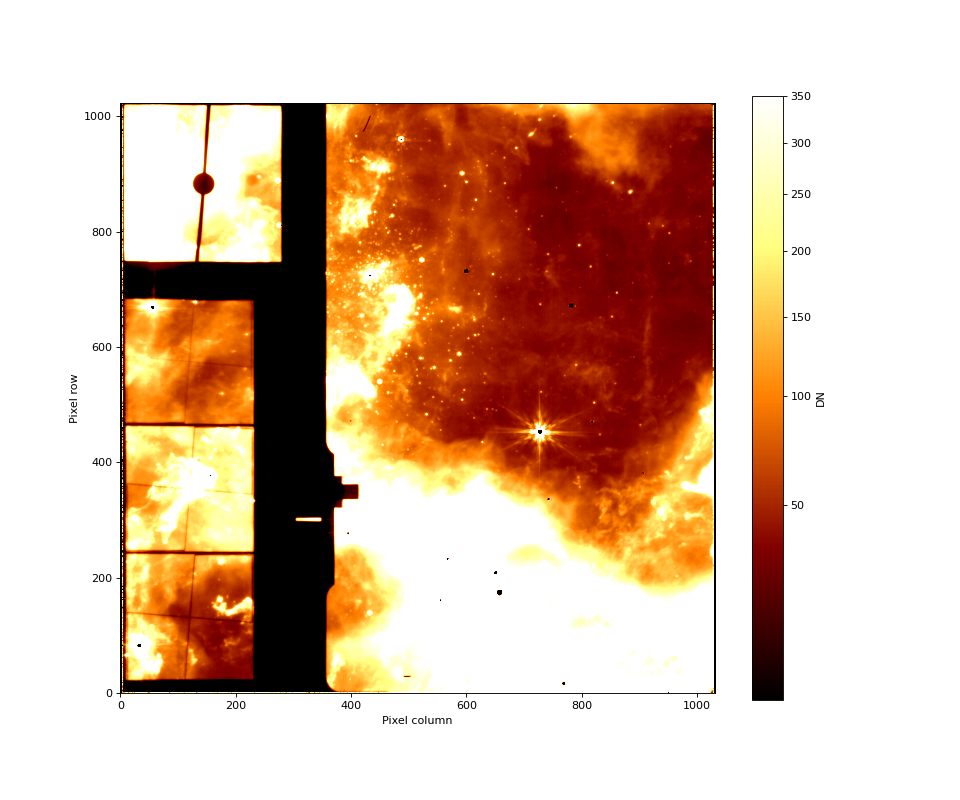

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

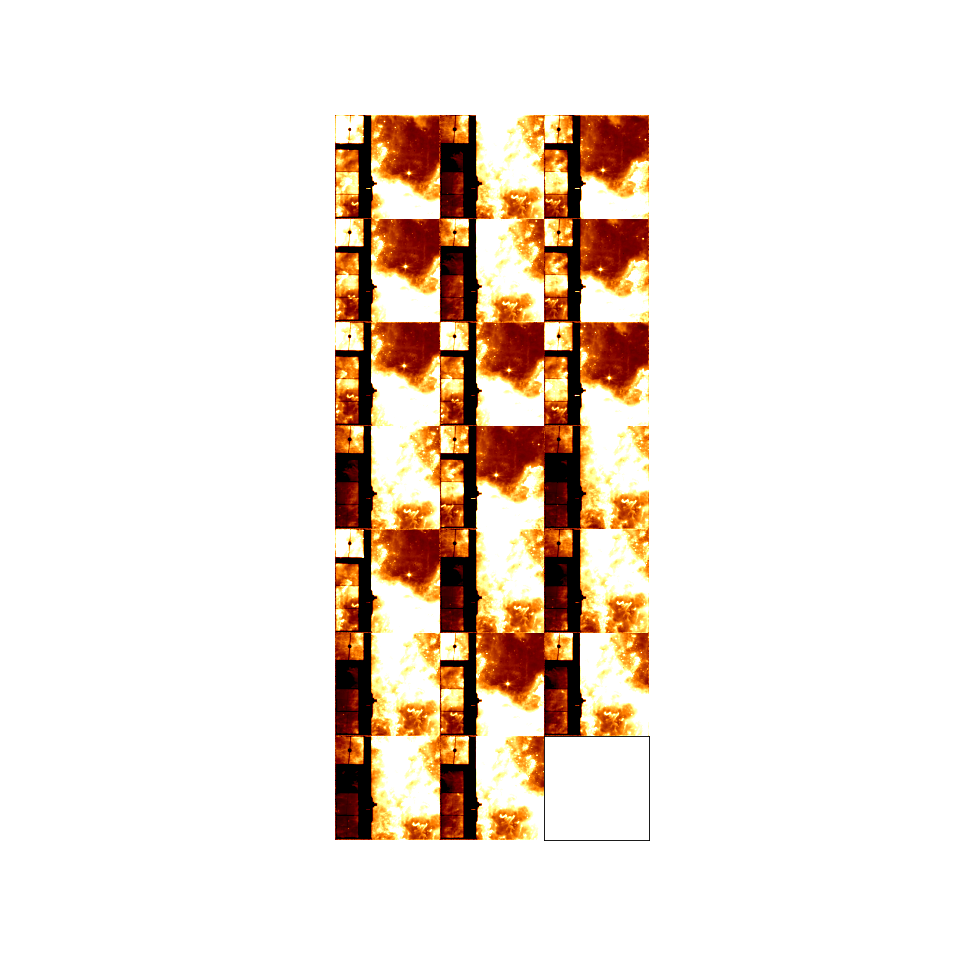

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F770W/stage1/jw02729002001_02101_00005_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002002_02101_00002_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002001_02101_00006_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002001_02101_00009_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002002_02101_00006_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002001_02101_00007_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002001_02101_00003_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002001_02101_00008_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002001_02101_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002002_02101_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002001_02101_00010_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002002_02101_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002001_02101_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002002_02101_00009_mirimage_fixed_rate.fits', './F770W/stage1/jw02729002002_021

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-20 11:11:15,159 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-20 11:11:15,160 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-20 11:11:15,161 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-20 11:11:15,162 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-20 11:11:16,472 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-20 11:11:16,472 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 11:11:16,473 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 11:11:16,474 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-20 11:11:16,475 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 11:11:16,476 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-20 11:11:16,477 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file 

2022-07-20 11:11:16,505 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-20 11:11:16,505 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-20 11:11:16,505 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-20 11:11:16,505 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-20 11:11:16,506 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00009_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-20 11:11:16,509 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022

2022-07-20 11:11:16,535 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 11:11:16,537 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-20 11:11:16,538 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-20 11:11:16,538 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-20 11:11:16,539 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-20 11:11:16,539 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-20 11:11:16,539 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-20 11:11:16,539 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-20 11:11:16,540 - stpipe.Image2Pi

2022-07-20 11:11:16,570 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-20 11:11:16,571 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-20 11:11:16,571 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-20 11:11:16,571 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-20 11:11:16,572 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-20 11:11:16,572 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 11:11:16,572 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 11:11:16,573 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-20 11:11:16,598 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-20 11:11:16,599 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-20 11:11:16,599 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-20 11:11:16,600 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-20 11:11:16,600 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-20 11:11:16,600 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-20 11:11:16,600 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-20 11:11:16,600 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-20 11:11:16,601 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027290020

2022-07-20 11:11:16,629 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 11:11:16,629 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 11:11:16,630 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-20 11:11:16,630 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 11:11:16,631 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-20 11:11:16,632 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-20 11:11:16,632 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-20 11:11:16,657 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-20 11:11:16,657 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-20 11:11:16,658 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-20 11:11:16,658 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02101_00002_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-20 11:11:16,661 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-20 11:11:16,662 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-07-20 11:11:16,688 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-20 11:11:16,688 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-20 11:11:16,689 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-20 11:11:16,689 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-20 11:11:16,689 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-20 11:11:16,689 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-20 11:11:16,689 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-20 11:11:16,690 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-20 11:11:16,690 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-20 11:11:18,893 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 11:11:19,062 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00005_mirimage_fixed_rate.fits>,).
2022-07-20 11:11:19,063 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-20 11:11:19,085 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-20 11:11:19,086 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 11:11:19,1

2022-07-20 11:11:25,257 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 11:11:25,365 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-20 11:11:25,366 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-20 11:11:25,366 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-20 11:11:25,366 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-20 11:11:25,407 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-20 11:11:25,409 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-20 11:11:25,409 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 11:11:25,410 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-20 11:11:25,426 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 11:11:25,602 - stpipe.Ima

2022-07-20 11:11:31,632 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-20 11:11:31,648 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 11:11:31,825 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00006_mirimage_fixed_rate.fits>,).
2022-07-20 11:11:31,826 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-20 11:11:31,850 - stpipe.Image2P

2022-07-20 11:11:37,459 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-20 11:11:37,642 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-20 11:11:38,140 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:11:38,472 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-20 11:11:38,904 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:11:39,241 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-20 11:11:39,700 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:11:40,036 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 11:11:40,491 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:11:40,843 - stpipe.Image2Pipeline.resample 

2022-07-20 11:11:45,703 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 11:11:46,154 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:11:46,507 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  84.600167938 -69.077648215 84.600304859 -69.109043754 84.689212283 -69.108971401 84.688947922 -69.077575966
2022-07-20 11:11:47,261 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw02729002002_02101_00006_mirimage_fixed_i2d.fits
2022-07-20 11:11:47,262 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-20 11:11:47,262 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw02729002002_02101_00006_mirimage_fixed
2022-07-20 11:11:47,263 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02729002001_02101_00007_mirimage_fixed
2022-07-20 11:11:47,264 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw027290

2022-07-20 11:11:52,980 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02729002001_02101_00003_mirimage_fixed
2022-07-20 11:11:52,980 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw02729002001_02101_00003_mirimage_fixed_rate.fits ...
2022-07-20 11:11:53,215 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00003_mirimage_fixed_rate.fits>,).
2022-07-20 11:11:53,216 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-07-20 11:11:59,129 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-20 11:11:59,206 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  84.643846765 -69.075499660 84.644542581 -69.106779510 84.732631395 -69.106549780 84.732621155 -69.075217074
2022-07-20 11:11:59,206 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.643846765 -69.075499660 84.644542581 -69.106779510 84.732631395 -69.106549780 84.732621155 -69.075217074
2022-07-20 11:11:59,206 - stpipe.Image2

2022-07-20 11:12:04,839 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.647078091 -69.077851987 84.647779039 -69.109131823 84.735877288 -69.108900276 84.735861965 -69.077567570
2022-07-20 11:12:04,839 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-20 11:12:04,904 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-20 11:12:05,112 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00001_mirimage_fixed_rate.fits>,).
2022-07-20 11:12:05,113 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-20 11:12:11,238 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 11:12:11,239 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 11:12:11,239 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 11:12:11,244 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 11:12:11,389 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 11:12:11,587 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00001_mirimage_fixed_rate.fits>,).
2022-07-20 11:12:11,588 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-20 11:12:17,525 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00010_mirimage_fixed_rate.fits>,).
2022-07-20 11:12:17,526 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-20 11:12:17,550 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-20 11:12:17,550 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 11:12:17,633 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-20 11:12:17

2022-07-20 11:12:23,327 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 11:12:23,449 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-20 11:12:23,450 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-20 11:12:23,450 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-20 11:12:23,450 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-20 11:12:23,491 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-20 11:12:23,493 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-20 11:12:23,493 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 11:12:23,493 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-20 11:12:23,510 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 11:12:23,720 - stpipe.Ima

2022-07-20 11:12:29,293 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-20 11:12:29,310 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 11:12:29,525 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00004_mirimage_fixed_rate.fits>,).
2022-07-20 11:12:29,526 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-20 11:12:29,550 - stpipe.Image2P

2022-07-20 11:12:35,629 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-20 11:12:35,815 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-20 11:12:36,309 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:12:36,632 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-20 11:12:37,124 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:12:37,456 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-20 11:12:37,950 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:12:38,282 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 11:12:38,773 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:12:39,121 - stpipe.Image2Pipeline.resample 

2022-07-20 11:12:44,096 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 11:12:44,565 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 11:12:44,910 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  84.591551906 -69.074222337 84.591675995 -69.105617882 84.680569533 -69.105550154 84.680318045 -69.074154705
2022-07-20 11:12:45,634 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw02729002002_02101_00003_mirimage_fixed_i2d.fits
2022-07-20 11:12:45,634 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-20 11:12:45,635 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw02729002002_02101_00003_mirimage_fixed
2022-07-20 11:12:45,636 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02729002002_02101_00008_mirimage_fixed
2022-07-20 11:12:45,636 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw027290

2022-07-20 11:12:51,482 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02729002001_02101_00002_mirimage_fixed
2022-07-20 11:12:51,482 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw02729002001_02101_00002_mirimage_fixed_rate.fits ...
2022-07-20 11:12:51,747 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02729002001_02101_00002_mirimage_fixed_rate.fits>,).
2022-07-20 11:12:51,749 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-07-20 11:12:57,676 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-20 11:12:57,756 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  84.602228744 -69.076615217 84.602662845 -69.107895670 84.690757877 -69.107759818 84.691009814 -69.076427241
2022-07-20 11:12:57,757 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.602228744 -69.076615217 84.602662845 -69.107895670 84.690757877 -69.107759818 84.691009814 -69.076427241
2022-07-20 11:12:57,757 - stpipe.Image2

2022-07-20 11:13:03,645 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.587531409 -69.078700609 84.587944766 -69.109981098 84.676048303 -69.109852698 84.676321070 -69.078520142
2022-07-20 11:13:03,645 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-20 11:13:03,712 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-20 11:13:03,933 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00005_mirimage_fixed_rate.fits>,).
2022-07-20 11:13:03,934 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-20 11:13:09,738 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 11:13:09,739 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 11:13:09,739 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 11:13:09,744 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 11:13:09,863 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 11:13:10,085 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002002_02101_00010_mirimage_fixed_rate.fits>,).
2022-07-20 11:13:10,086 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-20 11:13:23,336 - stpipe.Image2Pipeline - INFO - Saved model in ./F770W/stage2/jw02729002002_02101_00004_mirimage_fixed_cal.fits
2022-07-20 11:13:24,035 - stpipe.Image2Pipeline - INFO - Saved model in ./F770W/stage2/jw02729002001_02101_00004_mirimage_fixed_cal.fits
2022-07-20 11:13:24,778 - stpipe.Image2Pipeline - INFO - Saved model in ./F770W/stage2/jw02729002002_02101_00009_mirimage_fixed_cal.fits
2022-07-20 11:13:25,487 - stpipe.Image2Pipeline - INFO - Saved model in ./F770W/stage2/jw02729002002_02101_00003_mirimage_fixed_cal.fits
2022-07-20 11:13:26,214 - stpipe.Image2Pipeline - INFO - Saved model in ./F770W/stage2/jw02729002002_02101_00008_mirimage_fixed_cal.fits
2022-07-20 11:13:26,937 - stpipe.Image2Pipeline - INFO - Saved model in ./F770W/stage2/jw02729002001_02101_00002_mirimage_fixed_cal.fits
2022-07-20 11:13:27,695 - stpipe.Image2Pipeline - INFO - Saved model in ./F770W/stage2/jw02729002002_02101_00007_mirimage_fixed_cal.fits
2022-07-20 11:13:28,419 - stpipe.Image2Pi

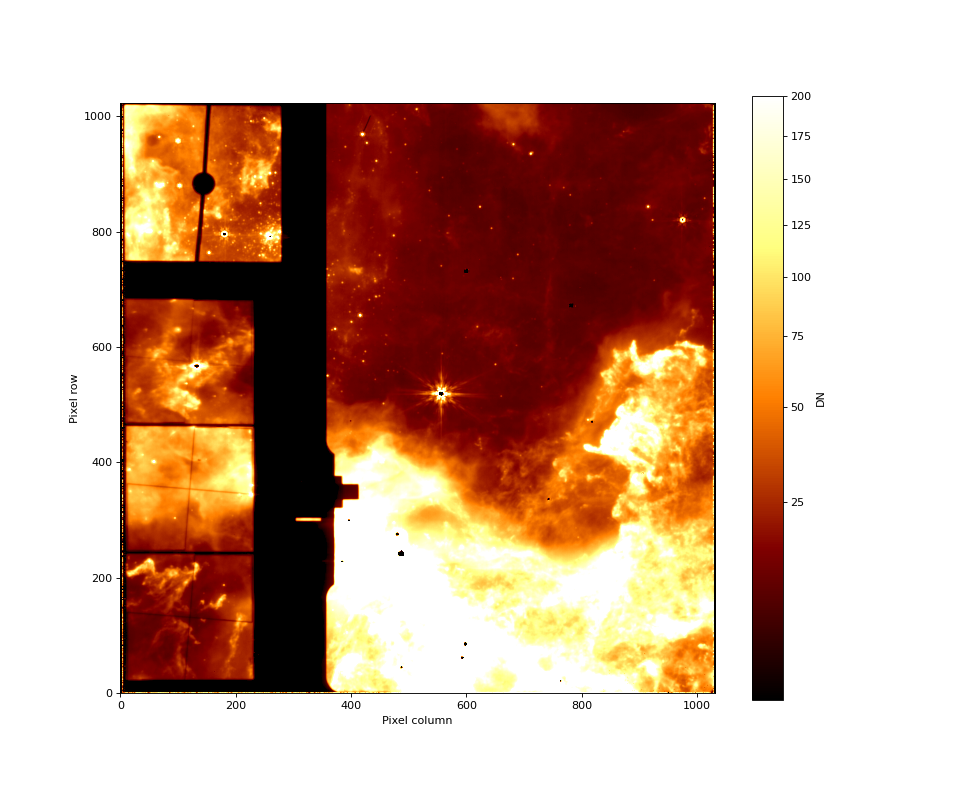

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

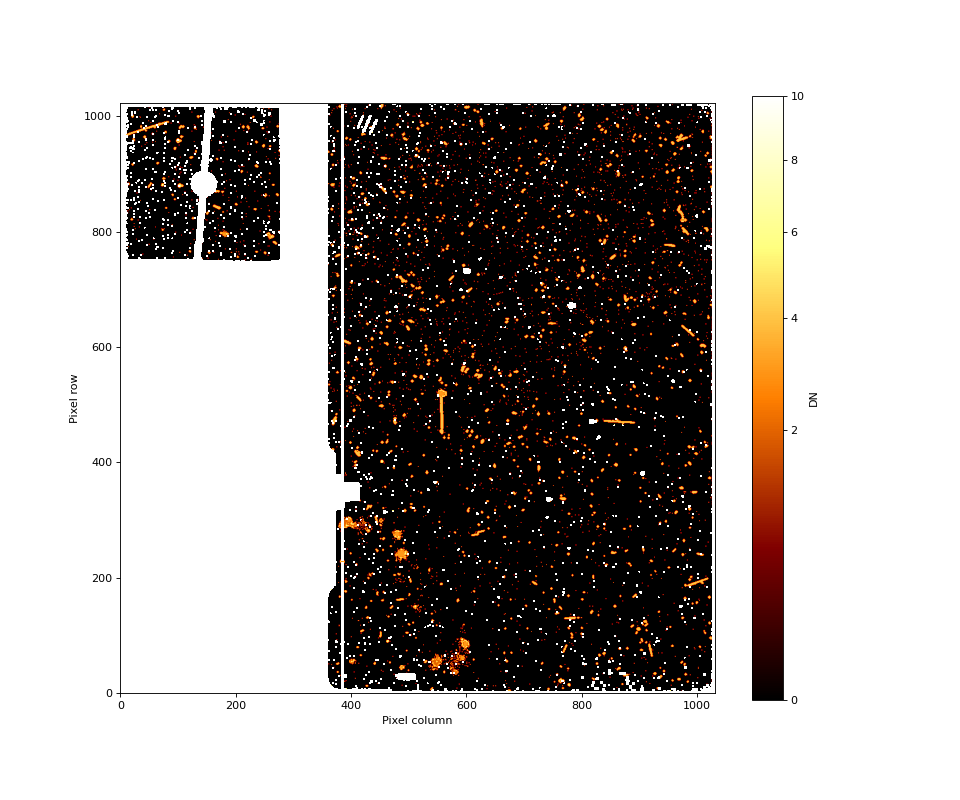

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

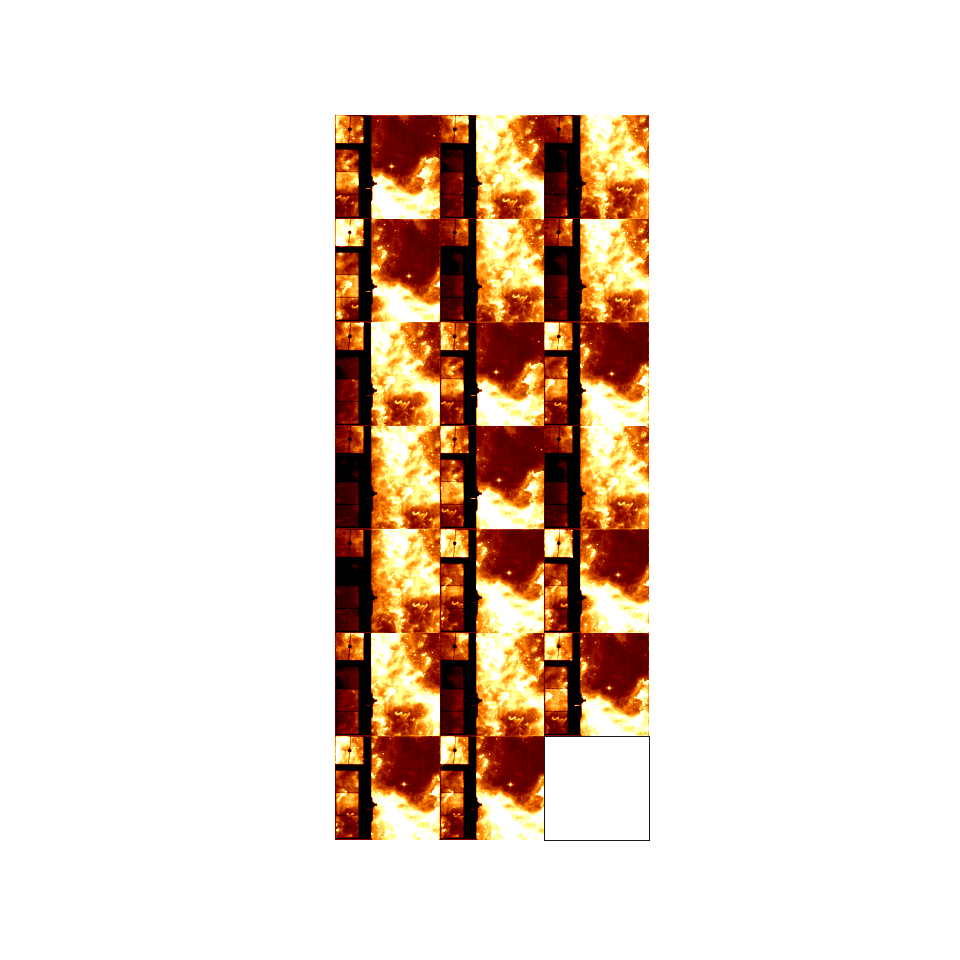

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F770W/stage2/jw02729002002_02101_00005_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002001_02101_00008_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002002_02101_00009_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002001_02101_00006_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002002_02101_00007_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002002_02101_00008_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002001_02101_00009_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002001_02101_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002001_02101_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002002_02101_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002002_02101_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002002_02101_00004_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002002_02101_00006_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02729002001_02101_00005_mirimage_fixed_wcs_ca

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-20 11:14:06,051 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-20 11:14:06,052 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-20 11:14:06,052 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-20 11:14:06,054 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-20 11:14:06,562 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 11:14:06,563 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-20 11:14:10,589 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-20 11:14:10,591 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.2, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-20 11:14:50,984 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 773 (0.07%)
2022-07-20 11:14:51,054 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 3870 (0.37%)
2022-07-20 11:14:51,122 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 4463 (0.42%)
2022-07-20 11:14:51,192 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 870 (0.08%)
2022-07-20 11:14:51,265 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 7788 (0.74%)
2022-07-20 11:14:51,335 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 9285 (0.88%)
2022-07-20 11:14:51,405 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 8517 (0.81%)
2022-07-20 11:14:51,475 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 774 (0.07%)
2022-07-20 11:14:51,544 - stpipe.Image3Pipe

2022-07-20 11:15:35,332 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 11:15:36,262 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 11:15:37,202 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 11:15:38,134 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 11:15:39,072 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 11:15:39,403 - stpipe.Image3Pipeline.resample - INFO - Resampling var_rnoise
2022-07-20 11:15:40,010 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 11:15:40,949 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 11:15:41,893 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1173, 1818)
2022-07-20 11:15:42,828 - stpipe.Image3Pipeline.resample - INFO 

2022-07-20 11:16:37,799 - stpipe.Image3Pipeline.source_catalog - INFO - Using APCORR reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_apcorr_0008.fits
2022-07-20 11:16:37,808 - stpipe.Image3Pipeline.source_catalog - INFO - Using ABVEGAOFFSET reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf
2022-07-20 11:16:37,809 - stpipe.Image3Pipeline.source_catalog - INFO - Instrument: MIRI
2022-07-20 11:16:37,809 - stpipe.Image3Pipeline.source_catalog - INFO - Detector: MIRIMAGE
2022-07-20 11:16:37,809 - stpipe.Image3Pipeline.source_catalog - INFO - Filter: F770W
2022-07-20 11:16:37,809 - stpipe.Image3Pipeline.source_catalog - INFO - Subarray: FULL
2022-07-20 11:16:37,935 - stpipe.Image3Pipeline.source_catalog - INFO - AB to Vega magnitude offset 4.38398
2022-07-20 11:16:38,018 - stpipe.Image3Pipeline.source_catalog - INFO - Background could not be estimated in meshes. Using the entire unmasked array for background estimation: bkg

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

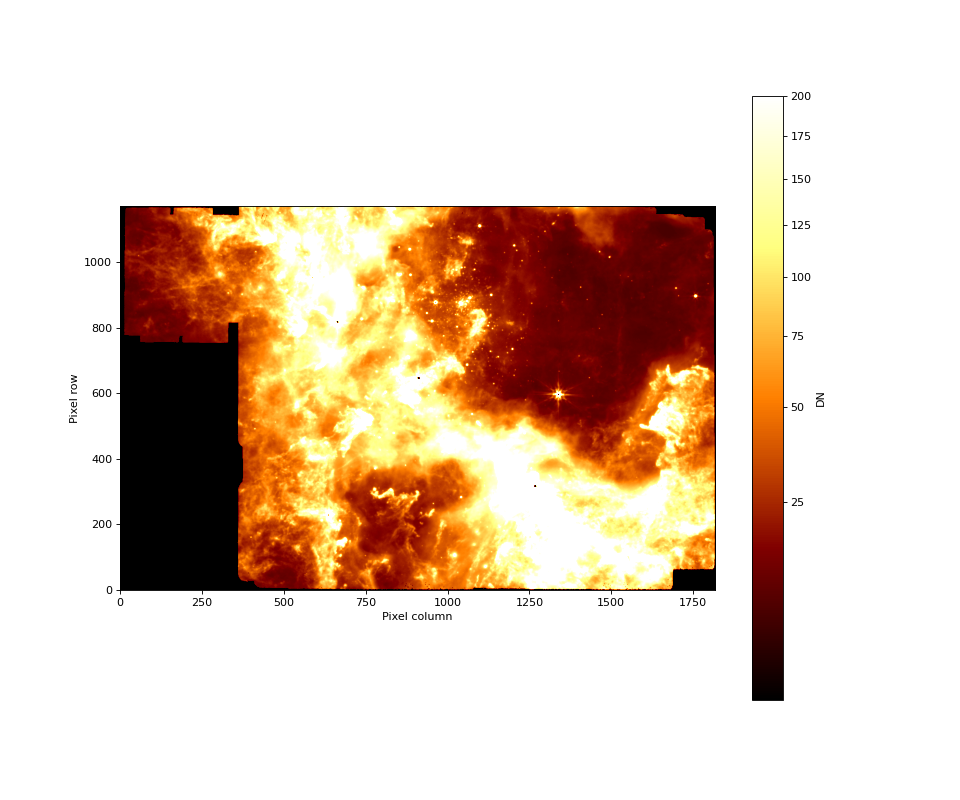

In [27]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

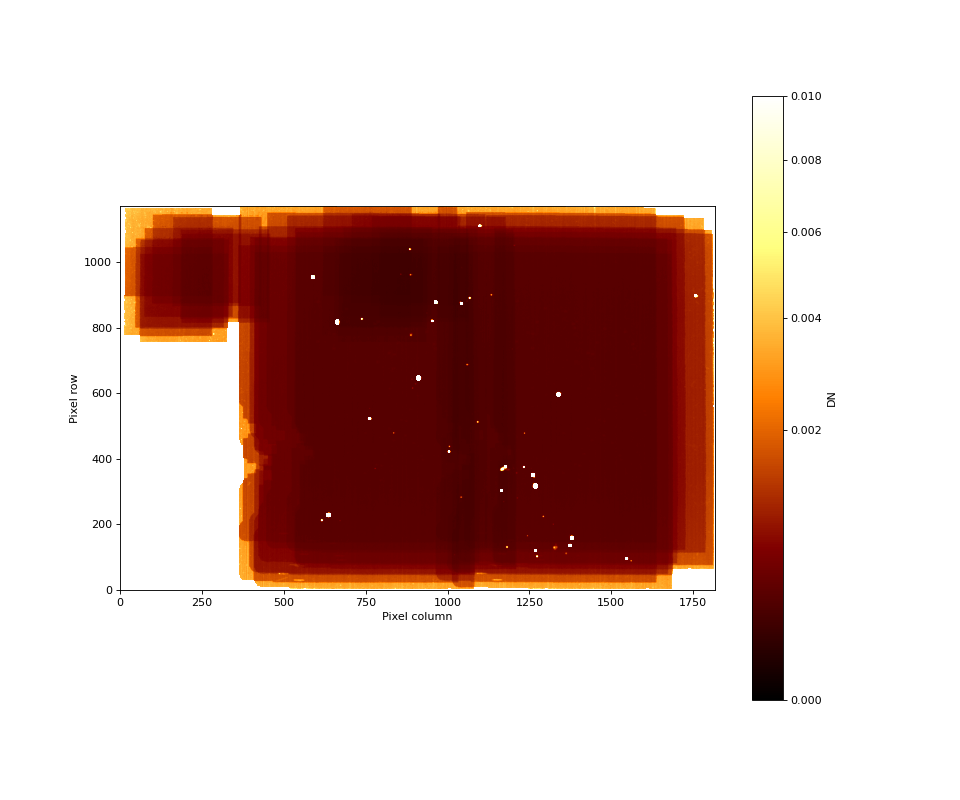

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

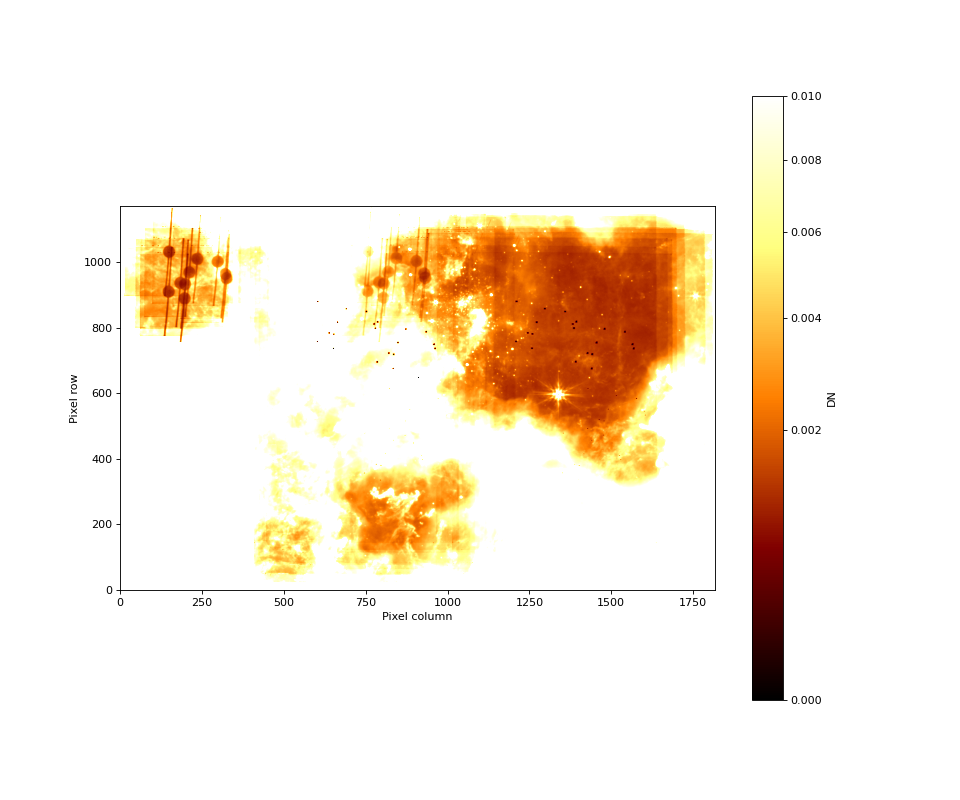

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

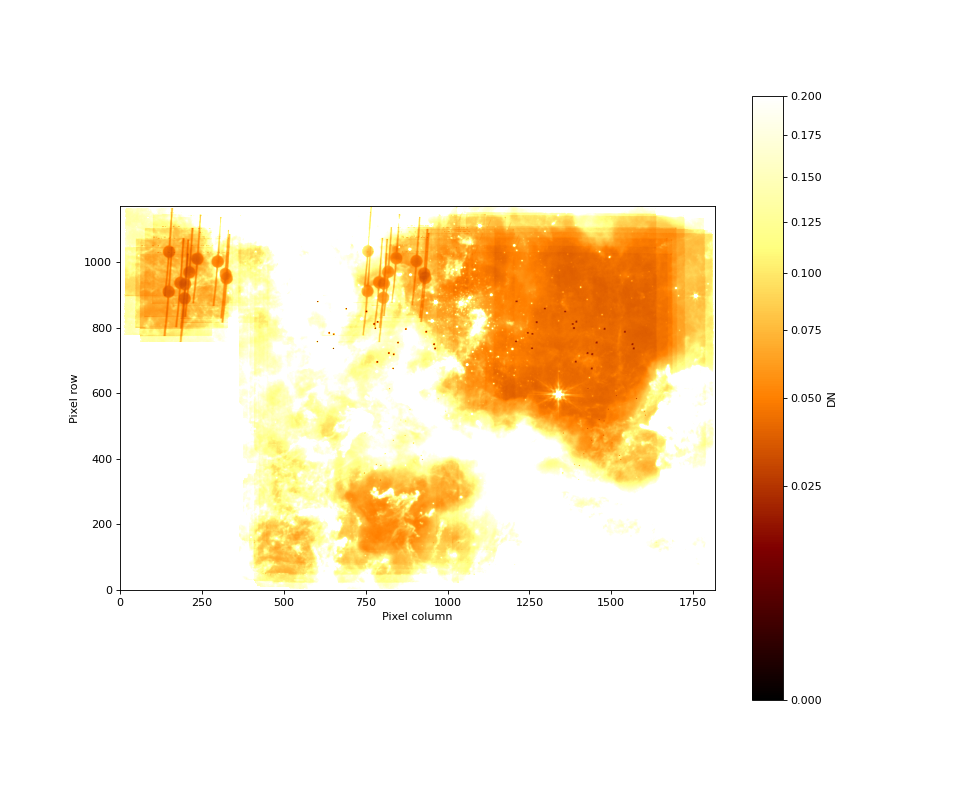

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

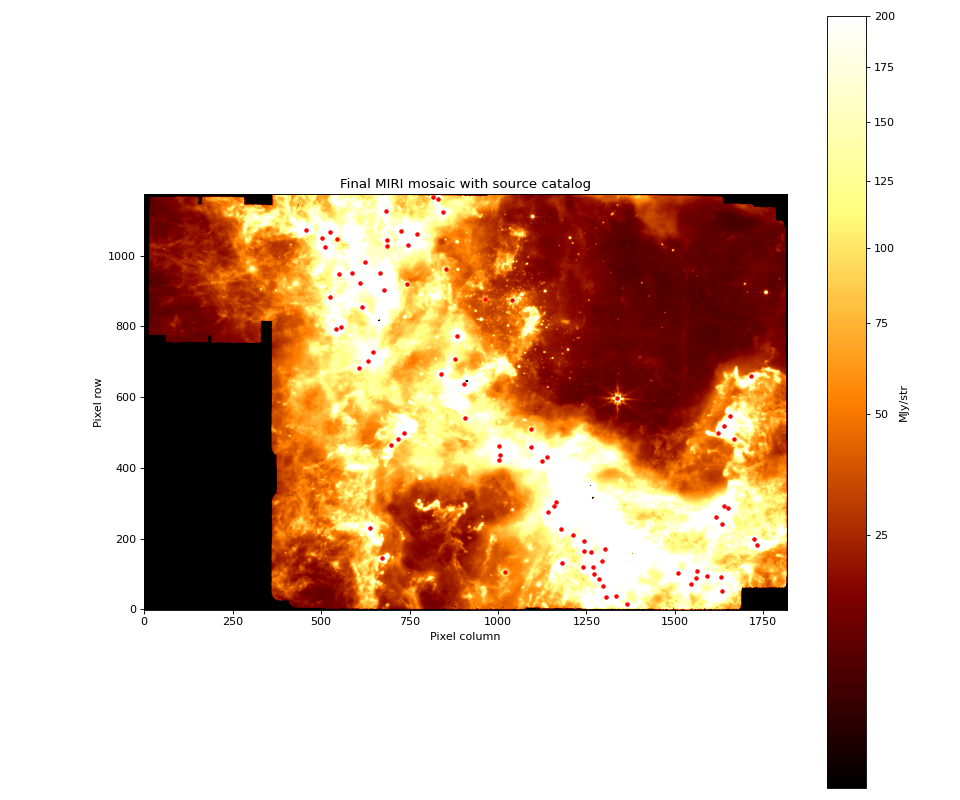

In [31]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)